In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


Se instala el modulo de spotipy, el cual contiene distintas funciones para consumir datos de la api de spotify.

In [2]:
import pandas as pd
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [3]:
id = '7b5c6d7790b34e6981532bcfbeff20a1'
secret = 'c1877373486a4959a024d4fdbee334ef'
playlistId = '4TsdcoJDYZgiip4G3YcAXe'

client_credentials_manager = SpotifyClientCredentials(client_id=id,client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Se declaran variables con el id del cliente (id), la llave secreta para acceder a la api (secret) y el id de la playlist de la cual se extraera la informacion.

In [4]:
def get_track_data(track):
    track_for_dataset = {'name': track['name'], 'album': track['album']['name'],
                    'artist': track['album']['artists'][0]['name'],
                     'number_tracks_album': track['album']['total_tracks'],
                    'duration_in_mins': round((track['duration_ms'] * 0.001) / 60.0, 2), 
                     'popularity': track['popularity'], 'track_number': track['track_number'],
                    'explicit' : track['explicit'],
                    'release_date': track['album']['release_date']}
    return track_for_dataset

Se crea una funcion la cual recivira un objeto con distintos datos para despues devolver otro objeto unicamente con los datos necesarios.

In [5]:
number_of_songs= 600

# Se declara el numero de canciones que se guardaran

songs_list = [] 

# Se crea un array (songs_list) el cual contiene todas canciones con la informacion completa

for i in range(int(number_of_songs/100)):
    playlist = sp.playlist_items(playlistId, offset=i*100)
    for item in playlist['items']:
        songs_list.append(item['track'])
# Se genera un loop en el cual se buscan y guardan agrupaciones de 100 canciones porque el modulo de spotipy no permite mas
    
tracks_analizis = []

for i in range(len(songs_list)):
    track = get_track_data(songs_list[i])
    tracks_analizis.append(track)
    
# Se crea otro array en el cual se guardan de nuevo las canciones pero filtradas para solo tener la informacion relevante

In [6]:
df =  pd.DataFrame(tracks_analizis)
df
# Se crea un dataframe con el array de los datos filtrados (tracks_analizis)

,name,album,artist,number_tracks_album,duration_in_mins,popularity,track_number,explicit,release_date
0,Press Start,Press Start,MDK,1,3.50,0,1,False,2015-08-26
1,The Sky Is A Neighborhood,Concrete and Gold,Foo Fighters,11,4.08,65,4,False,2017-09-15
2,Everlong,The Colour And The Shape,Foo Fighters,14,4.18,86,11,False,1997-05-20
3,The Pretender,"Echoes, Silence, Patience & Grace",Foo Fighters,12,4.49,81,1,False,2007-09-25
4,Best of You,In Your Honor,Foo Fighters,20,4.26,79,3,False,2005-06-14
...,...,...,...,...,...,...,...,...,...
595,Less Than Zero,Dawn FM,The Weeknd,16,3.53,80,15,False,2022-01-06
596,Sidewalks,Starboy,The Weeknd,18,3.86,74,9,True,2016-11-25
597,Six Feet Under,Starboy,The Weeknd,18,3.96,70,10,True,2016-11-25
598,Ordinary Life,Starboy,The Weeknd,18,3.70,66,14,False,2016-11-25


In [7]:
df.describe()

,number_tracks_album,duration_in_mins,popularity,track_number
count,600.000000,600.000000,600.000000,600.000000
mean,12.990000,4.277683,49.131667,5.220000
std,7.885654,1.518252,25.951496,4.237711
min,1.000000,0.550000,0.000000,1.000000
25%,10.000000,3.440000,35.000000,2.000000
50%,12.000000,4.005000,54.000000,4.000000
75%,15.000000,4.732500,68.250000,8.000000
max,68.000000,16.800000,94.000000,40.000000


<Axes: xlabel='explicit', ylabel='popularity'>

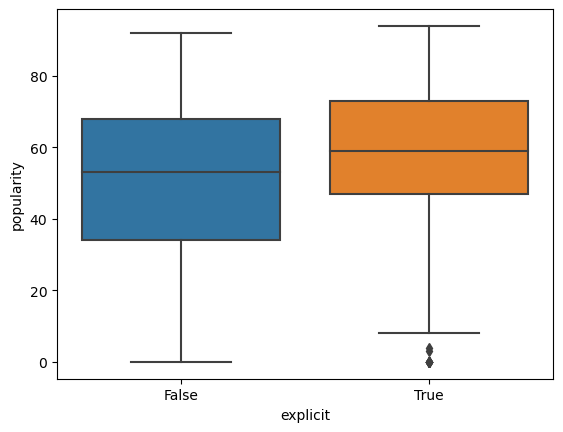

In [8]:
sns.boxplot(data=df, x="explicit", y="popularity")

La grafica anterior muestra como en promedio las canciones las cuales son explicitas tienden a ser mas populares, siendo entonces la popularidad un factor a tener encuenta si se quiere encontrar si una cancion es explicita.

<Axes: xlabel='duration_in_mins'>

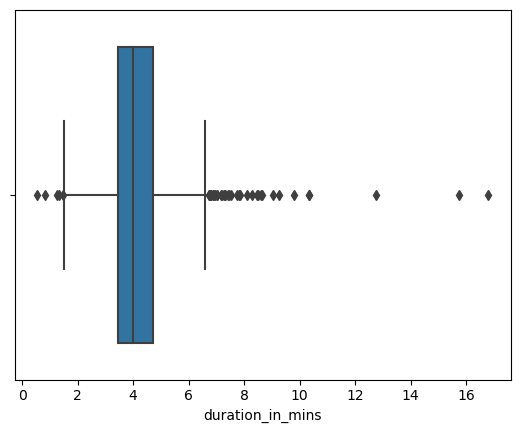

In [9]:
sns.boxplot(x=df["duration_in_mins"])

La grafica anterior muestra con comunmente las canciones tienen una duracion de entre 2 y 6 minutos, pero existen varios outliars que llegan a durar mas de 16 minutos, lo cual llega a afectar la media, pero como parece ser, no de forma sustancial.

C:\Users\simon\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


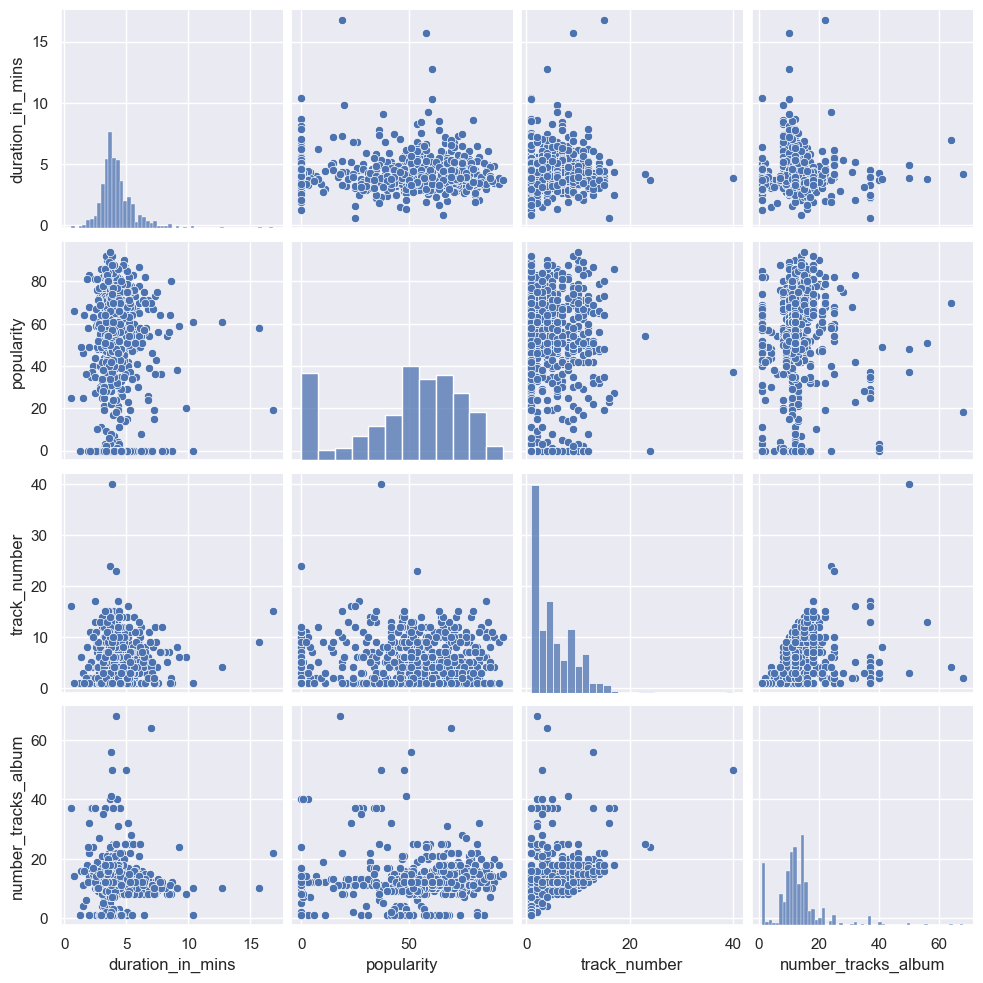

In [10]:
sns.set()
cols = ['duration_in_mins', 'popularity', 'track_number', 'number_tracks_album']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['duration_in_mins', 'popularity', 'track_number', 'number_tracks_album']], 
                                                    df['explicit'], test_size=0.2)

In [12]:
clf = DecisionTreeClassifier()

# Se crea un modelo predictivo (arbol de decisiones) en cual mediante unos datos clacifica si una canciones es explicita o no

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


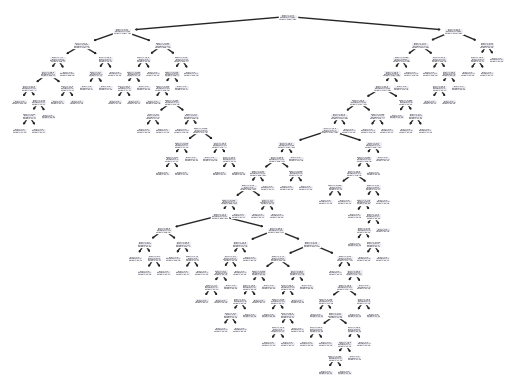

In [13]:
tree.plot_tree(clf)
plt.show()